In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [7]:
mergedf = pd.read_csv('metadata_otu_merged_famID-to-str.csv')
# mergedf = pd.read_csv('metadata_otu_merged_famID-to-str_onlyFamwPet.csv')
mergedf.head(1)

,Unnamed: 0,sample_name,age,age_in_years,age_units,agegroup,anonymized_name,body_habitat,body_product,body_site,...,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Nocardioidaceae; g__; s__.16,k__Bacteria; p__Firmicutes; c__Erysipelotrichi; o__Erysipelotrichales; f__Erysipelotrichaceae; g__; s__.7,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__[Odoribacteraceae]; g__Odoribacter; s__.1,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__intermedia,k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Streptococcaceae; g__Streptococcus; s__.41,k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__.6,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__.54,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__.23,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__.55,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Propionibacteriaceae; g__Propionibacterium; s__granulosum
0,0,797.02.HA.Forehead,1,1,years,Adolescent,FS_01,UBERON:skin,UBERON:sebum,UBERON:face,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(mergedf.shape)
mergedf = mergedf.drop("Unnamed: 0", axis=1)
mergedf = mergedf[mergedf.family_relationship !="none"]
print(mergedf.shape)

(1050, 1088)
(994, 1087)


In [10]:
human_data_train = mergedf[mergedf.host_common_name =="human"]
dog_data_test = mergedf[mergedf.host_common_name =="dog"]

X_train = human_data_train.iloc[:, 53:1085]
X_test = dog_data_test.iloc[:, 53:1085]
y_train = human_data_train["familyID"].values.reshape(-1, 1)
y_test = dog_data_test["familyID"].values.reshape(-1, 1)

In [11]:
# X = mergedf.iloc[:, 53:1085]
# y = mergedf["familyID"].values.reshape(-1, 1)
# print(X.shape, y.shape)

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
# X_train.head()

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.089
k: 3, Train/Test Score: 0.512/0.052
k: 5, Train/Test Score: 0.406/0.052
k: 7, Train/Test Score: 0.334/0.042
k: 9, Train/Test Score: 0.298/0.038
k: 11, Train/Test Score: 0.286/0.033
k: 13, Train/Test Score: 0.270/0.038
k: 15, Train/Test Score: 0.256/0.038
k: 17, Train/Test Score: 0.239/0.033
k: 19, Train/Test Score: 0.222/0.033


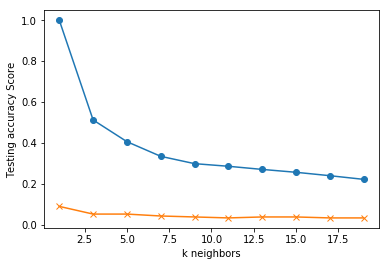

In [15]:
# from non-scaled data
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    train_score = knn.score(X_train, y_train.ravel())
    test_score = knn.score(X_test, y_test.ravel())
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train.ravel())
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test.ravel()))

k=5 Test Acc: 0.038


In [27]:
# predictions = classifier.predict(X_test)
# print(f"First 10 Predictions:   {predictions[:10]}")
# print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [28]:
# feature_names = X.columns
# sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [29]:
# import graphviz
# dot_data = tree.export_graphviz(
# clf, out_file=None,
# feature_names = feature_names,
# class_names= y,
# filled=True,
# rounded=True,
# special_characters=True)

# PLAYING WITH FILTERING

In [21]:

mergedf_filter = mergedf#[mergedf.role =="Partner"]
mergedf_filter = mergedf_filter[mergedf_filter.sample_type =="skin"]

X_f = mergedf_filter.iloc[:, 53:1085]
y_f = mergedf_filter["familyID"].values.reshape(-1, 1)
print(X_f.shape, y_f.shape)

(605, 1032) (605, 1)


In [22]:
human_data_train = mergedf_filter[mergedf_filter.host_common_name =="human"]
dog_data_test = mergedf_filter[mergedf_filter.host_common_name =="dog"]

X_train = human_data_train.iloc[:, 53:1085]
X_test = dog_data_test.iloc[:, 53:1085]
y_train = human_data_train["familyID"].values.reshape(-1, 1)
y_test = dog_data_test["familyID"].values.reshape(-1, 1)

k: 1, Train/Test Score: 1.000/0.085
k: 3, Train/Test Score: 0.552/0.064
k: 5, Train/Test Score: 0.461/0.057
k: 7, Train/Test Score: 0.386/0.050
k: 9, Train/Test Score: 0.343/0.050
k: 11, Train/Test Score: 0.332/0.050
k: 13, Train/Test Score: 0.308/0.050
k: 15, Train/Test Score: 0.289/0.043
k: 17, Train/Test Score: 0.272/0.035
k: 19, Train/Test Score: 0.259/0.035


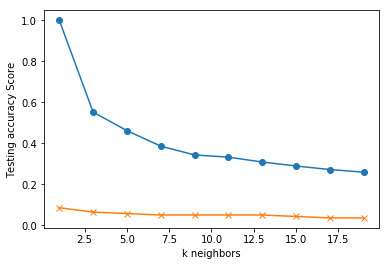

In [23]:
# from non-scaled data
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    train_score = knn.score(X_train, y_train.ravel())
    test_score = knn.score(X_test, y_test.ravel())
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train.ravel())
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test.ravel()))

k=5 Test Acc: 0.050


In [33]:
rf_f = RandomForestClassifier(n_estimators=200)
rf_f = rf_f.fit(X_train, y_train.ravel())
rf_f.score(X_test, y_test) #geni impurity coefficient

0.20567375886524822